In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [3]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.
    """
    start_mem = df.memory_usage().sum() / 1024**2
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                #if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                #    df[col] = df[col].astype(np.float16)
                #el
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        #else:
            #df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB --> {:.2f} MB (Decreased by {:.1f}%)'.format(
        start_mem, end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [4]:
df_loans = reduce_mem_usage(pd.read_csv("loans_dataset_v02.csv"))
df_loans = df_loans.drop('Unnamed: 0', axis=1)
df_loans.info()

Memory usage of dataframe is 75.05 MB --> 36.88 MB (Decreased by 50.9%)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113066 entries, 0 to 113065
Data columns (total 86 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingCreationDate                  113066 non-null  object 
 1   CreditGrade                          113066 non-null  object 
 2   Term                                 113066 non-null  int8   
 3   LoanStatus                           113066 non-null  object 
 4   BorrowerAPR                          113066 non-null  float32
 5   BorrowerRate                         113066 non-null  float32
 6   LenderYield                          113066 non-null  float32
 7   EstimatedEffectiveYield              83982 non-null   float32
 8   EstimatedLoss                        83982 non-null   float32
 9   EstimatedReturn                      83982 non-null   float32
 10  ProsperR

In [5]:
date_cols = ["ListingCreationDate","FirstRecordedCreditLine","LoanOriginationDate","DateCreditPulled"]
for col in date_cols:
    df_loans[col] = pd.to_datetime(df_loans[col])
    
#------------------------------------------------------------------

cat_features = ['CreditGrade','LoanStatus','ProsperRating (Alpha)','BorrowerState','Occupation','EmploymentStatus','IncomeRange']
dis_features = ['LoanOriginalAmount','LoanCurrentDaysDelinquent', 'Investors','Term','ListingCategory (numeric)','OpenRevolvingAccounts','LoanMonthsSinceOrigination','Recommendations','InvestmentFromFriendsCount','Loan_Quarter']
con_features = [col for col in df_loans.columns if df_loans[col].dtype == 'float32']
bo_features = ['IsBorrowerHomeowner','CurrentlyInGroup','IncomeVerifiable']
My_bo_features = ['after_July2009','had_PriorLoans','Is_ChargedOff','Is_CreditGradeApplicable','IsClosed','IsInProgress','IsLate','IsInGroup']
date_features =[col for col in df_loans.columns if df_loans[col].dtype == 'datetime64[ns]']

#---------------------------------------------------------------------

df_loans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113066 entries, 0 to 113065
Data columns (total 86 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   ListingCreationDate                  113066 non-null  datetime64[ns]
 1   CreditGrade                          113066 non-null  object        
 2   Term                                 113066 non-null  int8          
 3   LoanStatus                           113066 non-null  object        
 4   BorrowerAPR                          113066 non-null  float32       
 5   BorrowerRate                         113066 non-null  float32       
 6   LenderYield                          113066 non-null  float32       
 7   EstimatedEffectiveYield              83982 non-null   float32       
 8   EstimatedLoss                        83982 non-null   float32       
 9   EstimatedReturn                      83982 non-null   float32       
 

Action: **presentation three main focuses are on the most critical part of Peer-to-Peer Lending which is CreditGrade , BorrowerRate and Lender Yield not to mention the custom built risk assesment tool called ProsperScore to assess the creditworthiness of the borrower.**

Research Question 1 : **What are the most number of borrowers Credit
Grade?** 


In [6]:
# Check the univariate relationship of Credit Grade

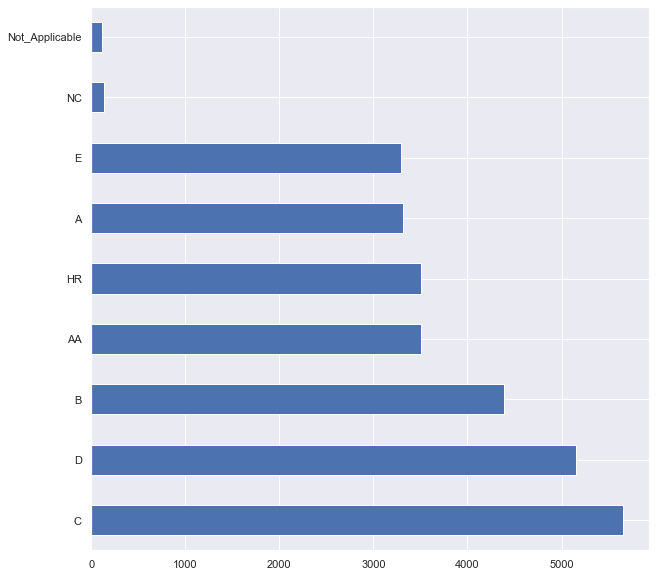

In [7]:
#  Applicable for listings pre-2009 period 
plt.figure(figsize=(10,10))
df_loans[df_loans['Is_CreditGradeApplicable']==1]['CreditGrade'].value_counts().plot(kind = 'barh')
plt.show()

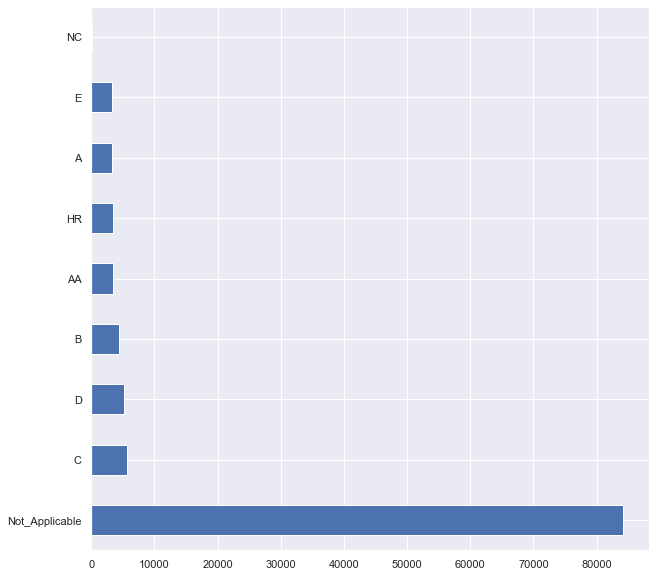

In [8]:
# without taking the period into consideration
plt.figure(figsize=(10,10))
df_loans['CreditGrade'].value_counts().plot(kind = 'barh')
plt.show()

In [9]:
df_loans_grouped = df_loans[df_loans['Is_CreditGradeApplicable']==1].groupby('CreditGrade').count()

In [10]:
df_loans_grouped['LoanKey']

CreditGrade
A                 3315
AA                3509
B                 4389
C                 5649
D                 5153
E                 3289
HR                3508
NC                 141
Not_Applicable     116
Name: LoanKey, dtype: int64

In [11]:
df_loans_grouped_N_C = df_loans.groupby('CreditGrade').count()
df_loans_grouped_N_C['LoanKey']

CreditGrade
A                  3315
AA                 3509
B                  4389
C                  5649
D                  5153
E                  3289
HR                 3508
NC                  141
Not_Applicable    84113
Name: LoanKey, dtype: int64

##### the most number of borrowers Credit Grade is 5649 and it's for grad "C"

### --------------------------------------------------------------------------------------------------------------------------------------------------------------

Research Question 2 : **Since there are so much low Credit Grade such
as C and D , does it lead to a higher amount of deliquency?** 

In [12]:
# Check the univariate relationship of Loan Status

In [13]:
grouped_onCreditGrad = df_loans.groupby('CreditGrade')

In [14]:
grouped_onCreditGrad[['AmountDelinquent','CurrentDelinquencies']].sum()

,AmountDelinquent,CurrentDelinquencies
CreditGrade,,
A,1468447.0,853.0
AA,714782.0,372.0
B,1993381.0,1688.0
C,4190127.0,4229.0
D,5449386.0,5994.0
E,4168174.0,9300.0
HR,5950753.0,16952.0
NC,0.0,258.0
Not_Applicable,80119032.0,27228.0


In [15]:
grouped_onCreditGrad_App = df_loans[df_loans['Is_CreditGradeApplicable']==1].groupby('CreditGrade')
grouped_onCreditGrad_App[['AmountDelinquent','CurrentDelinquencies']].sum()

,AmountDelinquent,CurrentDelinquencies
CreditGrade,,
A,1468447.0,853.0
AA,714782.0,372.0
B,1993381.0,1688.0
C,4190127.0,4229.0
D,5449386.0,5994.0
E,4168174.0,9300.0
HR,5950753.0,16952.0
NC,0.0,258.0
Not_Applicable,56809.0,37.0


In [16]:
grouped_onCreditGrad_App['AmountDelinquent'].sum().index

Index(['A', 'AA', 'B', 'C', 'D', 'E', 'HR', 'NC', 'Not_Applicable'], dtype='object', name='CreditGrade')

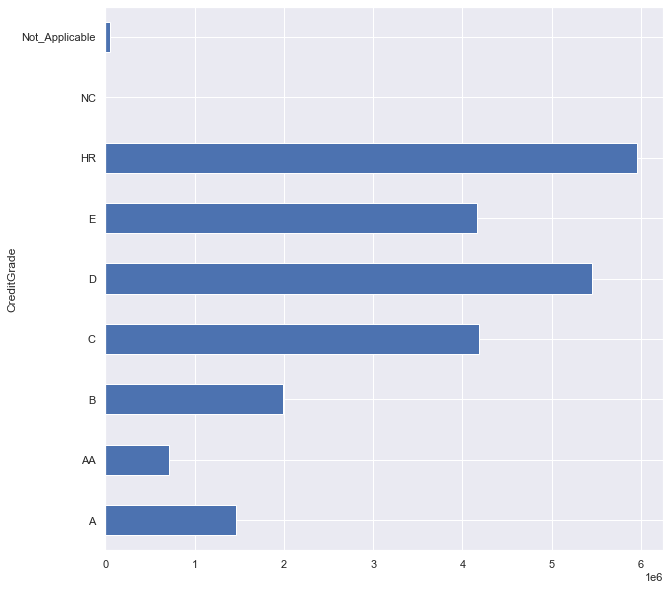

In [17]:
plt.figure(figsize=(10,10))
grouped_onCreditGrad_App['AmountDelinquent'].sum().plot.barh()
plt.show()

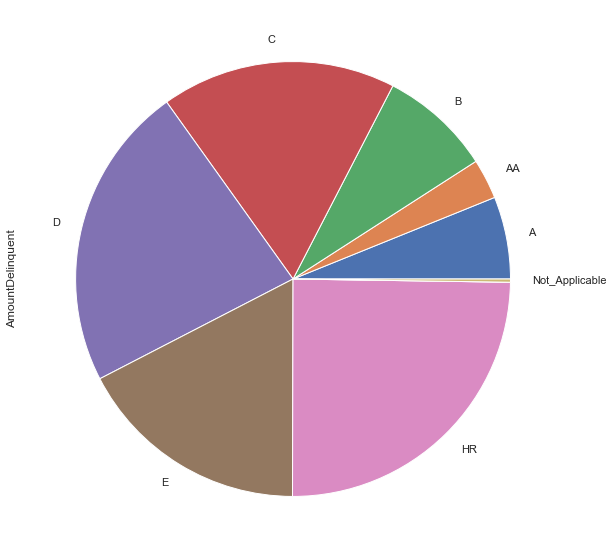

In [18]:
plt.figure(figsize=(10,10))
grouped_onCreditGrad_App['AmountDelinquent'].sum().plot.pie()
plt.show()

##### as we can see here low Credit Grade such as C and D lead to a higher amount of deliquency

### --------------------------------------------------------------------------------------------------------------------------------------------------------------

Research Question 3 : **What is the highest number of BorrowerRate?** 

In [19]:
# Check the univariate relationship of Borrower rate

In [20]:
df_loans['BorrowerRate'].describe()

count    113066.000000
mean          0.192948
std           0.074916
min           0.000000
25%           0.134000
50%           0.184000
75%           0.250600
max           0.497500
Name: BorrowerRate, dtype: float64

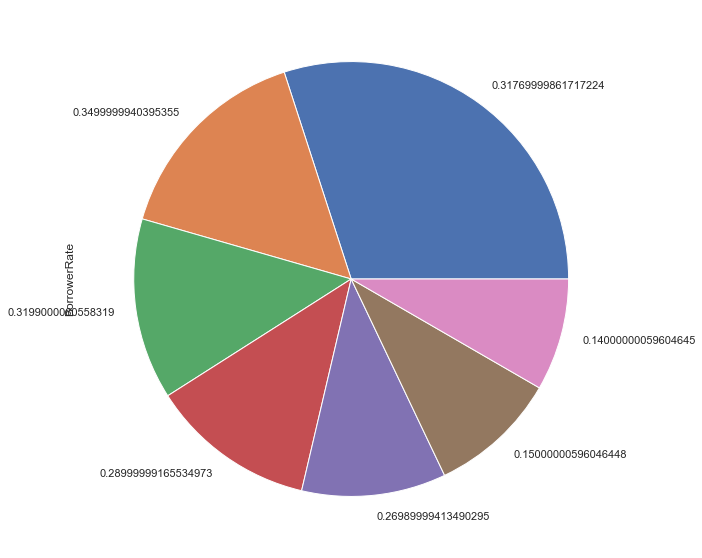

In [21]:
plt.figure(figsize=(10,10))
df_loans['BorrowerRate'].value_counts()[df_loans['BorrowerRate'].value_counts() > 1000].plot.pie()
plt.show()

C:\Users\m2021\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


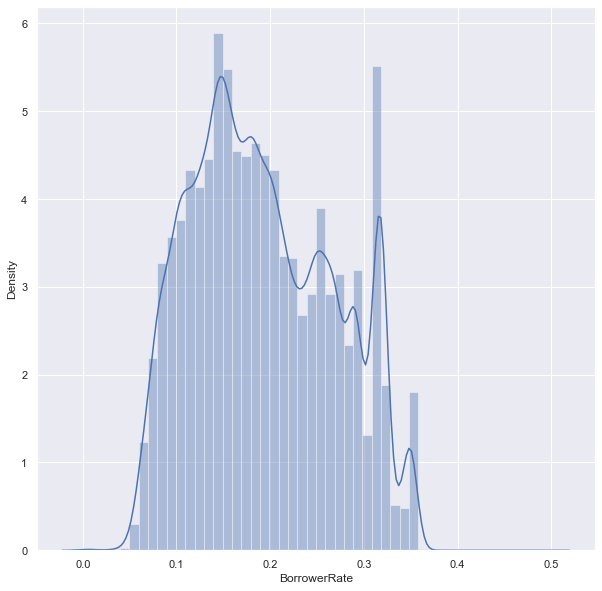

In [22]:
plt.figure(figsize=(10,10))
sns.distplot(df_loans['BorrowerRate'])
plt.show()

##### the highest number of BorrowerRate is within the range of 0.1 and 0.2 and on the small interval of 0.319  to 0.3499

### --------------------------------------------------------------------------------------------------------------------------------------------------------------

Research Question 4 : **Since the highest number of Borrower Rate
is between 0.1 and 0.2, does the highest number of Lender Yield is
between 0.1 and 0.2?** 

In [23]:
# Check the univariate relationship of Lender Yield on Loan

In [24]:
df_loans['LenderYield'].describe()

count    113066.000000
mean          0.182885
std           0.074610
min          -0.010000
25%           0.124500
50%           0.174000
75%           0.240600
max           0.492500
Name: LenderYield, dtype: float64

C:\Users\m2021\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


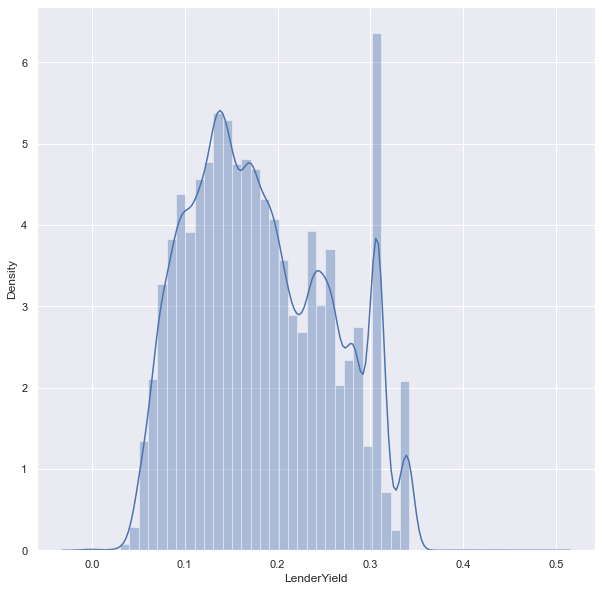

In [25]:
plt.figure(figsize=(10,10))
sns.distplot(df_loans['LenderYield'])
plt.show()

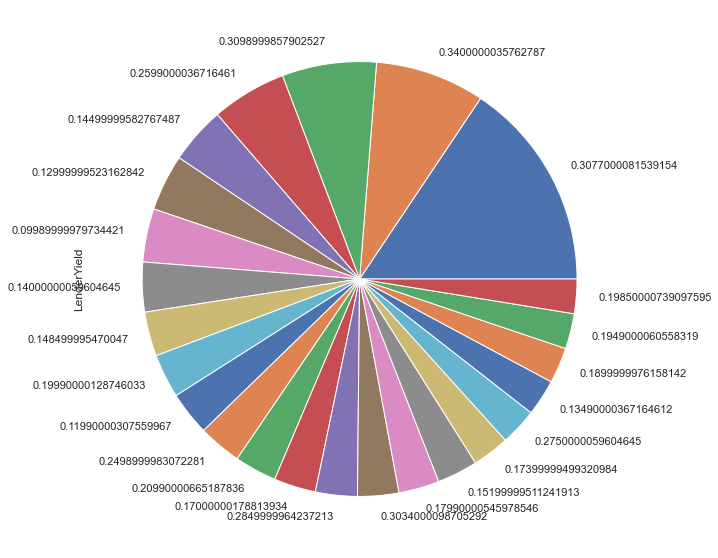

In [26]:
plt.figure(figsize=(10,10))
df_loans['LenderYield'].value_counts()[df_loans['LenderYield'].value_counts() > 600].plot.pie()
plt.show()

Text(0.5, 1.0, 'Correlation')

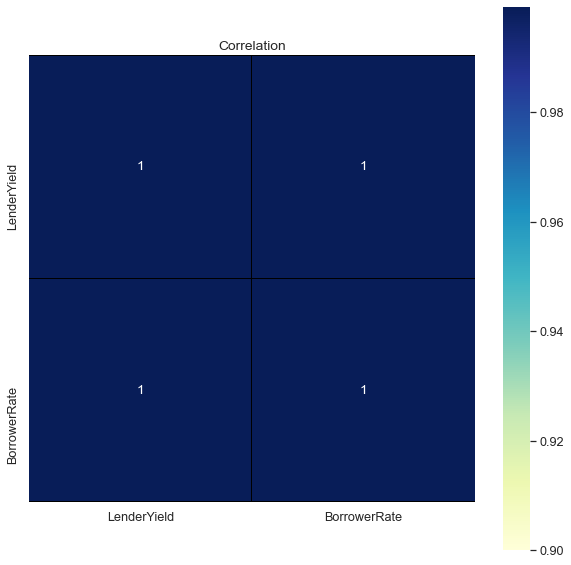

In [27]:
sns.set(font_scale=1.15)
plt.figure(figsize=(10, 10))
sns.heatmap(df_loans[['LenderYield','BorrowerRate']].corr(),  vmax=0.9, linewidths=0.02,
           square=True,
            annot=True,
            cmap='YlGnBu',
            linecolor="black")
plt.title('Correlation')

##### as we can see that there is a very strong correlation between the BorrowerRate and the LenderYield. so we can say that the highest number of BorrowerRate is between 0.1 and 0.2 leads the highest number of LenderYield is between 0.1 and 0.2 ,however, if we look at the distribution we will find that the hieghest number is almost at 0.3 but maybe thus because when we tried to deal with the missing data in this particular column we used the median here and it was very close to 0.3

### --------------------------------------------------------------------------------------------------------------------------------------------------------------

Research Question 5 : **Is the Credit Grade really accurate? Does
higher Credit Grade leads to higher Monthly Loan Payment? As for
Higher Credit Grade we mean from Grade AA to B** 

In [28]:
# Check the Bivariate Relationship between CreditGarde and MonthlyLoan Payment

In [29]:
df_loans[['CreditGrade','MonthlyLoanPayment']].head()

,CreditGrade,MonthlyLoanPayment
0,C,330.429993
1,Not_Applicable,318.929993
2,HR,123.320000
3,Not_Applicable,321.450012
4,Not_Applicable,563.969971


In [30]:
df_loans['MonthlyLoanPayment'].describe()

count    113066.000000
mean        271.930634
std         192.551315
min           0.000000
25%         130.949997
50%         217.369995
75%         370.570007
max        2251.510010
Name: MonthlyLoanPayment, dtype: float64

In [31]:
grouped_onCreditGrad_App['MonthlyLoanPayment'].sum()

CreditGrade
A                 1.042989e+06
AA                1.045972e+06
B                 1.267856e+06
C                 1.227066e+06
D                 9.055865e+05
E                 4.261437e+05
HR                3.269074e+05
NC                1.222894e+04
Not_Applicable    1.669979e+04
Name: MonthlyLoanPayment, dtype: float32

In [32]:
grouped_onCreditGrad_App['MonthlyLoanPayment'].describe()    #.loc['A']

,count,mean,std,min,25%,50%,75%,max
CreditGrade,,,,,,,,
A,3315.0,314.627106,250.669617,0.0,125.509998,239.240005,439.514999,1130.900024
AA,3509.0,298.082275,256.395630,0.0,94.000000,199.289993,442.859985,1094.140015
B,4389.0,288.870544,217.635925,0.0,131.330002,225.860001,375.950012,1130.900024
C,5649.0,217.217621,175.397903,0.0,101.809998,172.960007,277.320007,1047.640015
D,5153.0,175.739563,142.045776,0.0,86.660004,138.990005,222.979996,1061.290039
E,3289.0,129.566422,107.571480,0.0,62.880001,111.489998,155.740005,1047.640015
HR,3508.0,93.189186,65.962791,0.0,44.110001,82.285000,123.320000,774.719971
NC,141.0,86.730057,60.332783,0.0,39.230000,80.580002,113.220001,413.640015
Not_Applicable,116.0,143.963684,115.581978,0.0,62.652500,111.794998,182.057495,578.690002


In [33]:
grouped_onCreditGrad['MonthlyLoanPayment'].describe() 

,count,mean,std,min,25%,50%,75%,max
CreditGrade,,,,,,,,
A,3315.0,314.627106,250.669617,0.0,125.509998,239.240005,439.514999,1130.900024
AA,3509.0,298.082275,256.395630,0.0,94.000000,199.289993,442.859985,1094.140015
B,4389.0,288.870544,217.635925,0.0,131.330002,225.860001,375.950012,1130.900024
C,5649.0,217.217621,175.397903,0.0,101.809998,172.960007,277.320007,1047.640015
D,5153.0,175.739563,142.045776,0.0,86.660004,138.990005,222.979996,1061.290039
E,3289.0,129.566422,107.571480,0.0,62.880001,111.489998,155.740005,1047.640015
HR,3508.0,93.189186,65.962791,0.0,44.110001,82.285000,123.320000,774.719971
NC,141.0,86.730057,60.332783,0.0,39.230000,80.580002,113.220001,413.640015
Not_Applicable,84113.0,291.172150,186.471069,0.0,156.889999,250.850006,387.429993,2251.510010


In [34]:
grouped_onCreditGrad_App['MonthlyLoanPayment'].sum() *10**-4

CreditGrade
A                 104.298897
AA                104.597244
B                 126.785606
C                 122.706573
D                  90.558647
E                  42.614365
HR                 32.690739
NC                  1.222894
Not_Applicable      1.669979
Name: MonthlyLoanPayment, dtype: float32

In [35]:
grouped_onCreditGrad_App['MonthlyLoanPayment'].count()

CreditGrade
A                 3315
AA                3509
B                 4389
C                 5649
D                 5153
E                 3289
HR                3508
NC                 141
Not_Applicable     116
Name: MonthlyLoanPayment, dtype: int64

In [36]:
grouped_onCreditGrad_App['MonthlyLoanPayment'].sum()/grouped_onCreditGrad_App['MonthlyLoanPayment'].count()

CreditGrade
A                 314.627149
AA                298.082787
B                 288.871298
C                 217.218224
D                 175.739666
E                 129.566329
HR                 93.189112
NC                 86.730074
Not_Applicable    143.963699
Name: MonthlyLoanPayment, dtype: float64

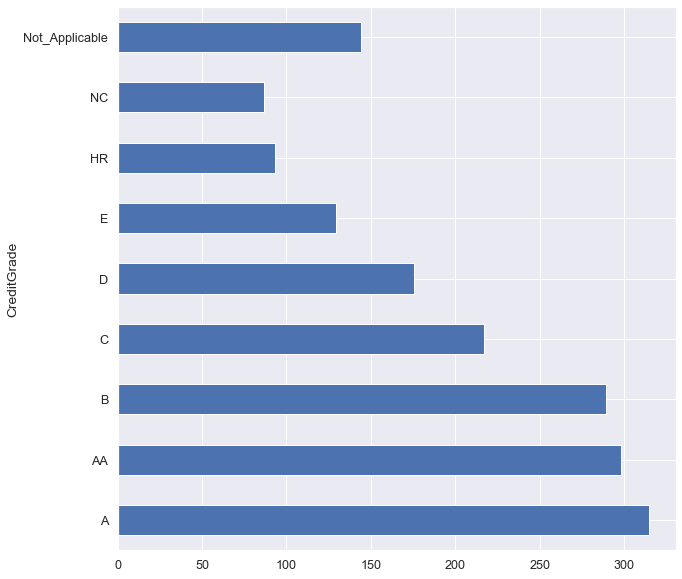

In [37]:
# the average Monthly Loan Payment
plt.figure(figsize=(10,10))
(grouped_onCreditGrad_App['MonthlyLoanPayment'].sum()/grouped_onCreditGrad_App['MonthlyLoanPayment'].count()).plot.barh()
plt.show()

##### from the previous tabels we can here that higher Credit Grade leads to higher Monthly Loan Payment

### --------------------------------------------------------------------------------------------------------------------------------------------------------------

Research Question 6 : **Here we look at the Completed Loan Status
and Defaulted Rate to determine the accuracy of Credit Grade.**

In [38]:
 # Check the Bivariate Relatonship between CreditGrade and LoanStatus

In [39]:
df_loans['LoanStatus'].value_counts()

Current                   55730
Completed                 38061
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        800
Past Due (31-60 days)       361
Past Due (61-90 days)       311
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      203
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

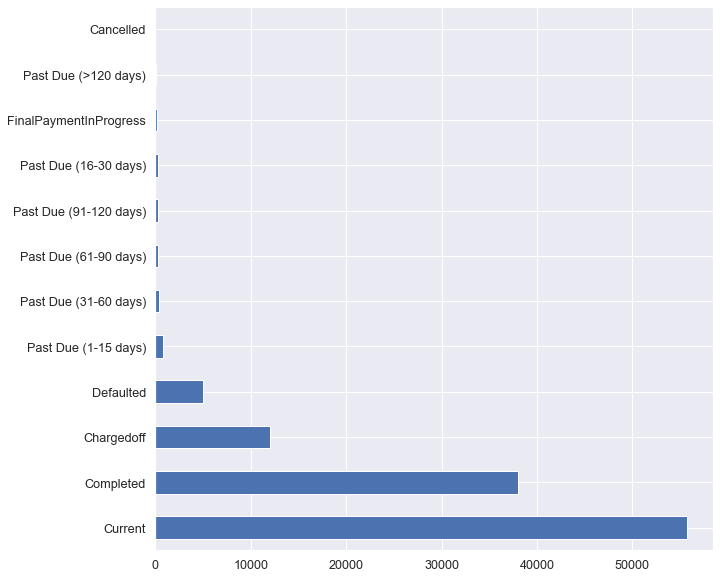

In [40]:
plt.figure(figsize=(10,10))
df_loans['LoanStatus'].value_counts().plot.barh()
plt.show()

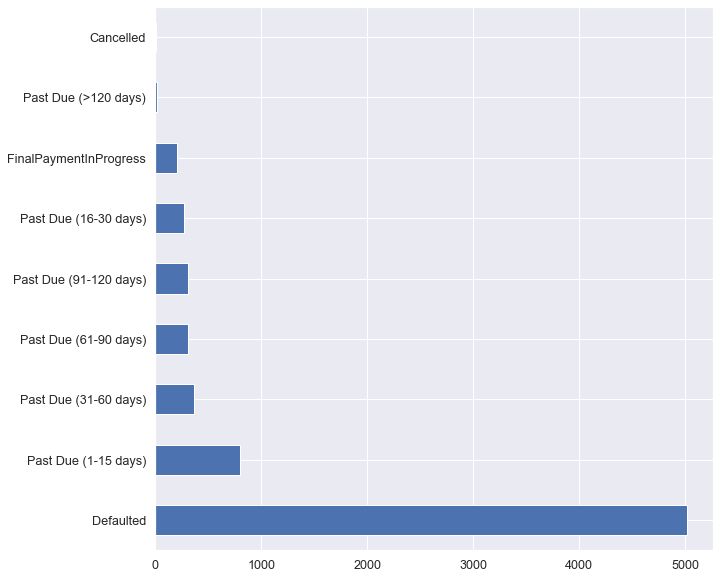

In [41]:
plt.figure(figsize=(10,10))
df_loans['LoanStatus'].value_counts()[3:].plot.barh()
plt.show()

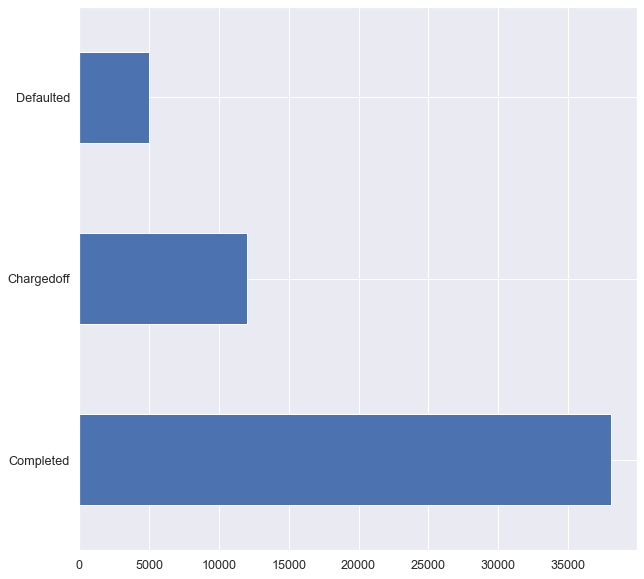

In [42]:
plt.figure(figsize=(10,10))
df_loans['LoanStatus'].value_counts()[1:4].plot.barh()
plt.show()

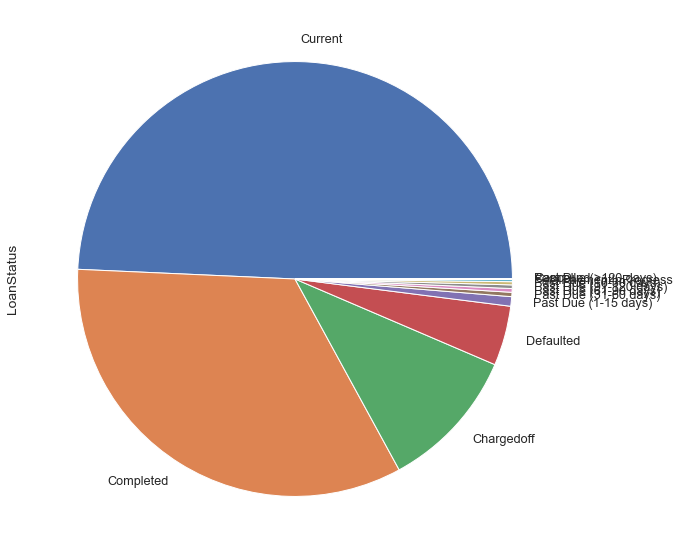

In [43]:
plt.figure(figsize=(10,10))
df_loans['LoanStatus'].value_counts().plot.pie()
plt.show()

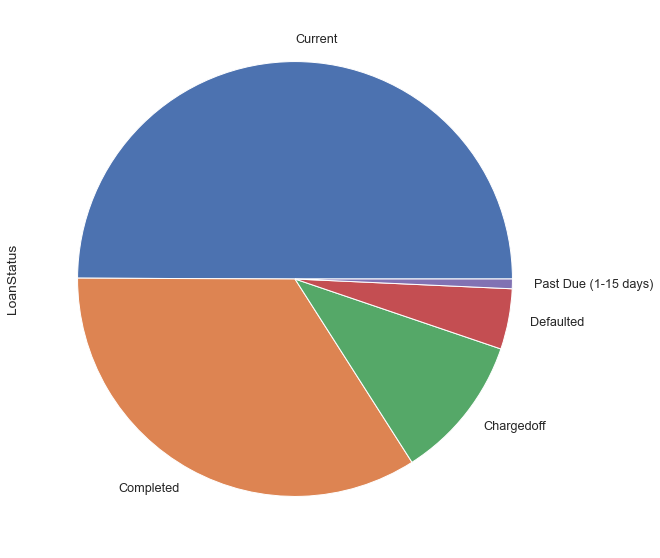

In [44]:
plt.figure(figsize=(10,10))
df_loans['LoanStatus'].value_counts()[:5].plot.pie()
plt.show()

grouped_onCreditGrad
grouped_onCreditGrad_App

In [45]:
grouped_onCreditGrad_App['LoanStatus'].value_counts() #.loc[grade]

CreditGrade     LoanStatus
A               Completed     2505
                Chargedoff     526
                Defaulted      283
                Cancelled        1
AA              Completed     2969
                Chargedoff     339
                Defaulted      201
B               Completed     2987
                Chargedoff     909
                Defaulted      493
C               Completed     3609
                Chargedoff    1310
                Defaulted      729
                Cancelled        1
D               Completed     3126
                Chargedoff    1343
                Defaulted      684
E               Completed     1678
                Chargedoff     946
                Defaulted      665
HR              Completed     1372
                Chargedoff    1242
                Defaulted      891
                Cancelled        3
NC              Defaulted       64
                Completed       42
                Chargedoff      35
Not_Applicable  Completed   

In [46]:
grades = list(df_loans['CreditGrade'].unique())

C


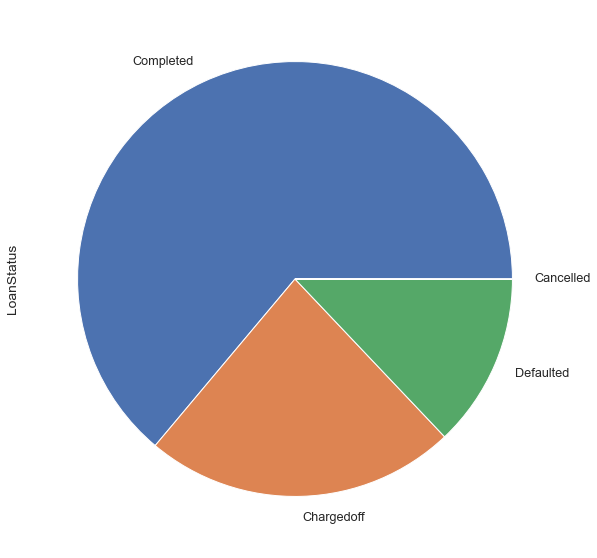

---------------------------------------------------------------------------------------------------------------------
Not_Applicable


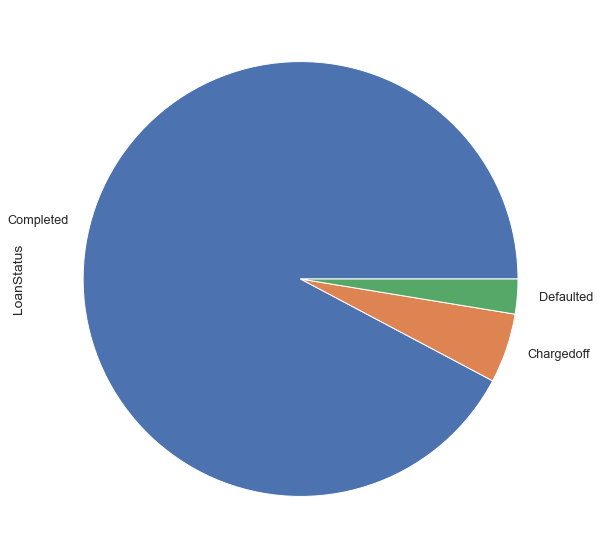

---------------------------------------------------------------------------------------------------------------------
HR


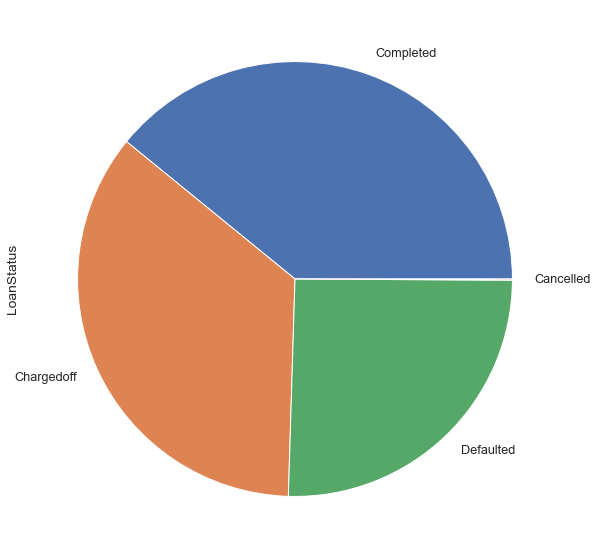

---------------------------------------------------------------------------------------------------------------------
AA


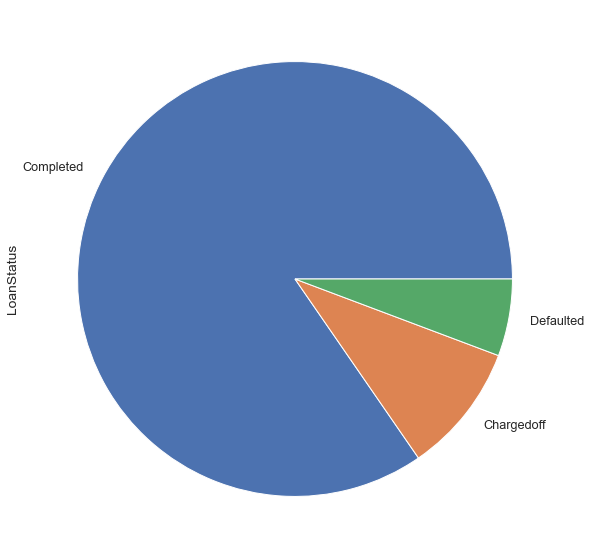

---------------------------------------------------------------------------------------------------------------------
D


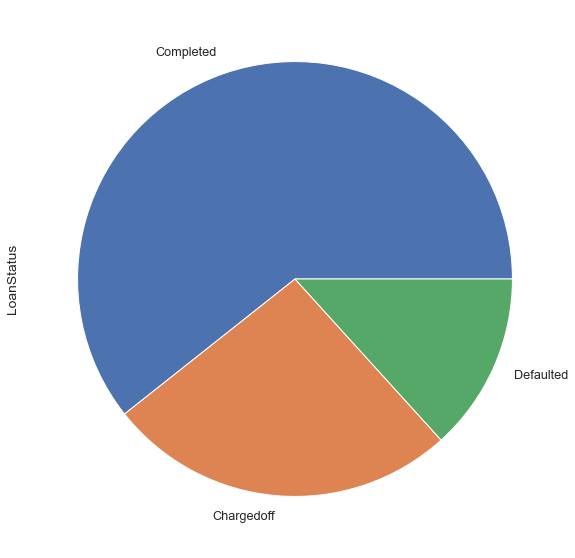

---------------------------------------------------------------------------------------------------------------------
B


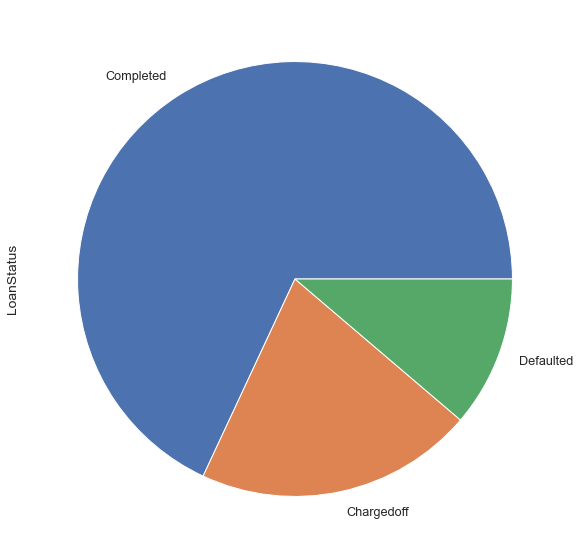

---------------------------------------------------------------------------------------------------------------------
E


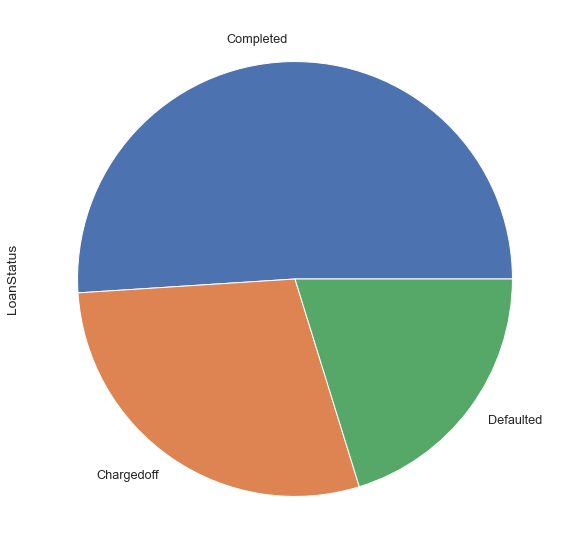

---------------------------------------------------------------------------------------------------------------------
A


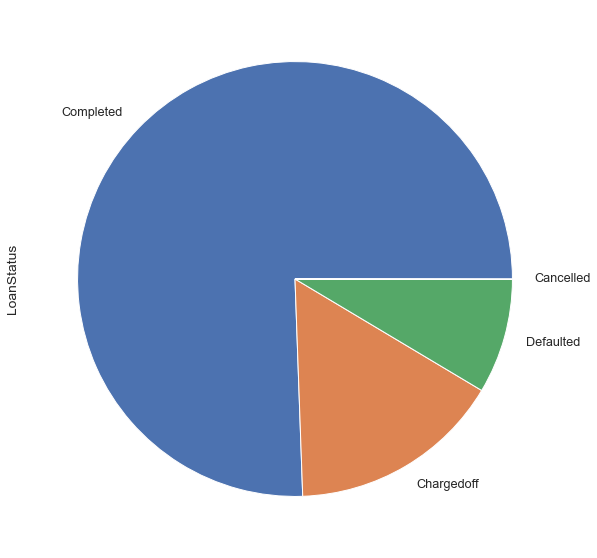

---------------------------------------------------------------------------------------------------------------------
NC


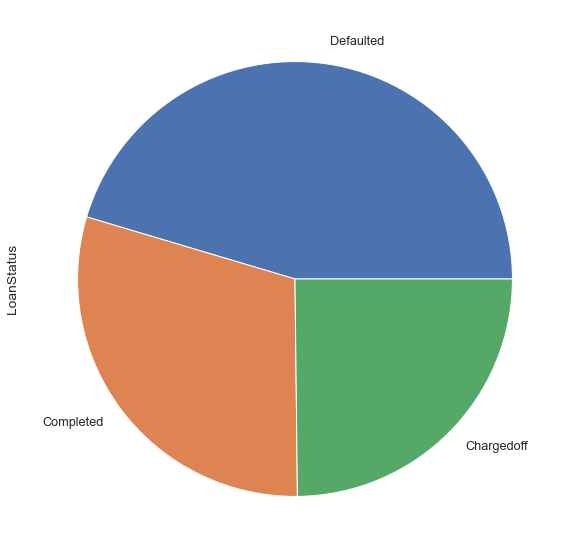

---------------------------------------------------------------------------------------------------------------------


In [47]:
for grade in grades:
    print(grade)
    plt.figure(figsize=(10,10))
    grouped_onCreditGrad_App['LoanStatus'].value_counts().loc[grade].plot.pie()
    plt.show()
    print("---------------------------------------------------------------------------------------------------------------------")

C


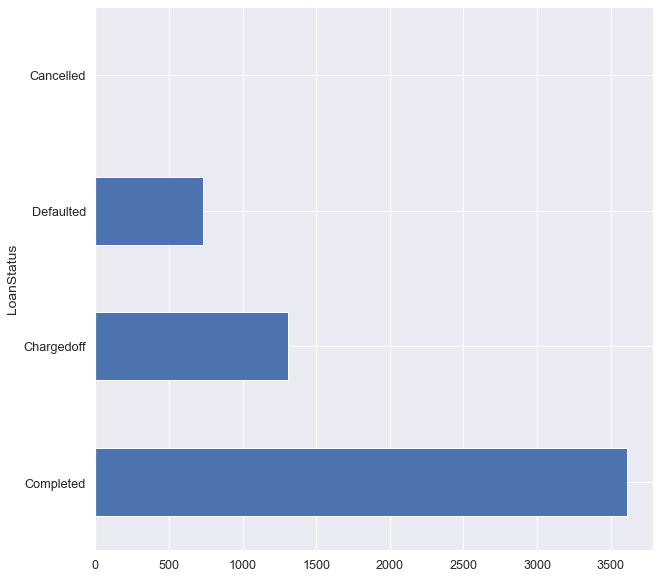

---------------------------------------------------------------------------------------------------------------------
Not_Applicable


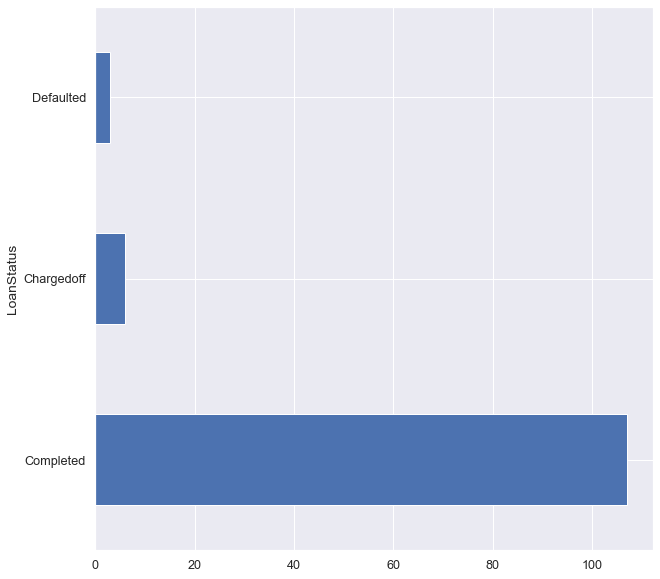

---------------------------------------------------------------------------------------------------------------------
HR


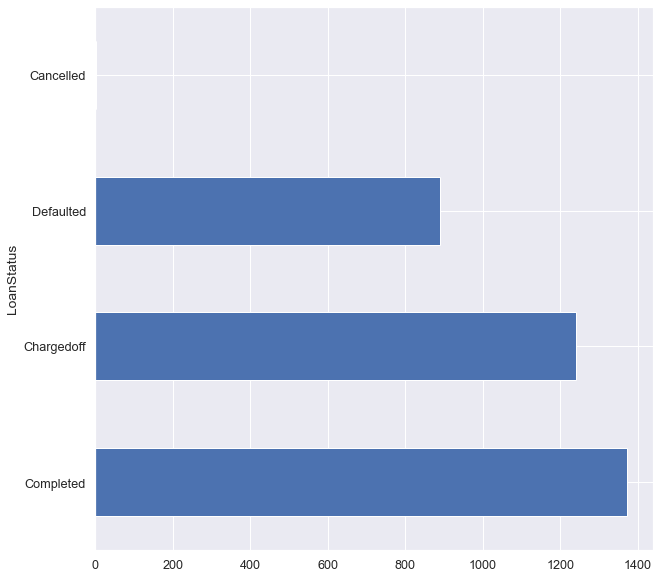

---------------------------------------------------------------------------------------------------------------------
AA


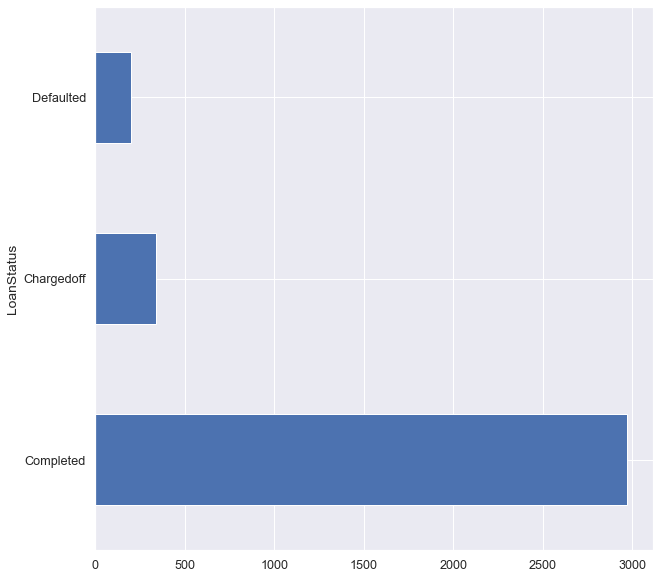

---------------------------------------------------------------------------------------------------------------------
D


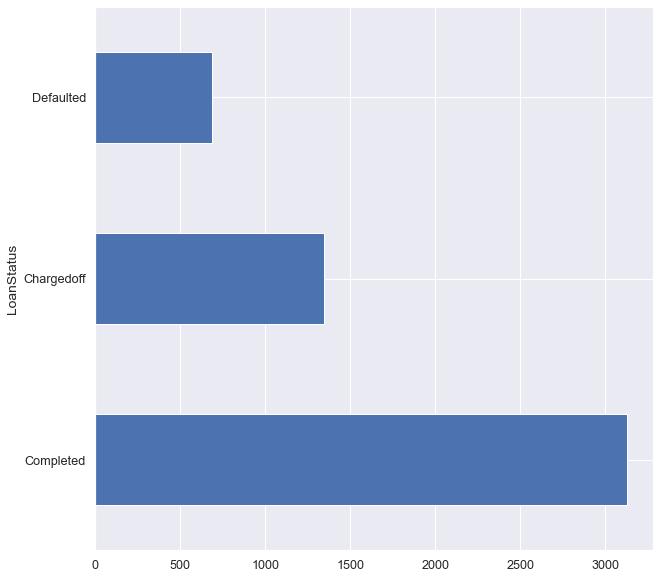

---------------------------------------------------------------------------------------------------------------------
B


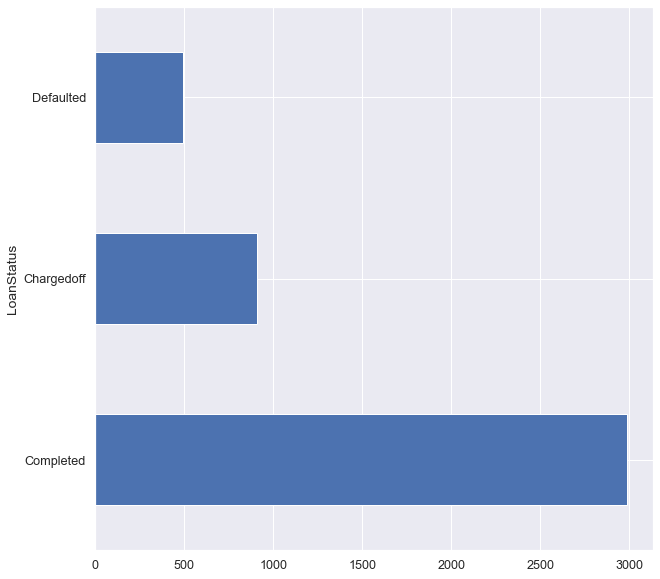

---------------------------------------------------------------------------------------------------------------------
E


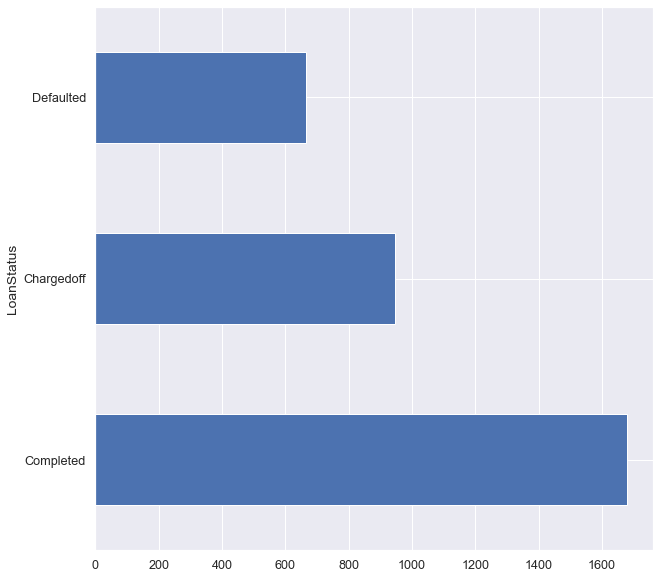

---------------------------------------------------------------------------------------------------------------------
A


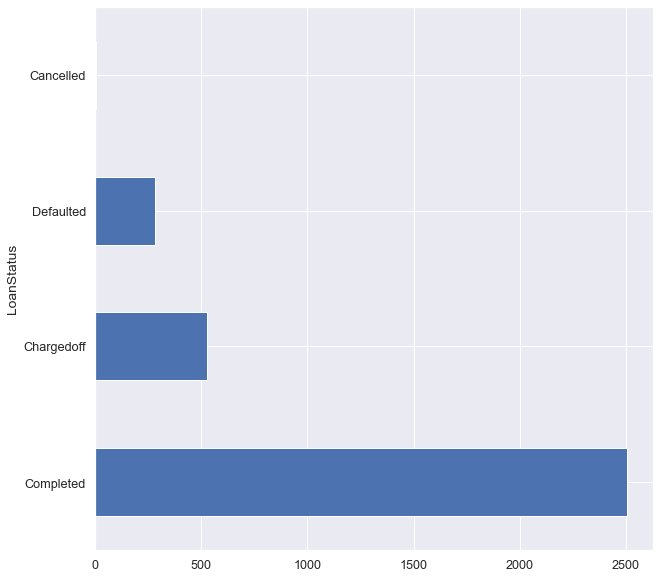

---------------------------------------------------------------------------------------------------------------------
NC


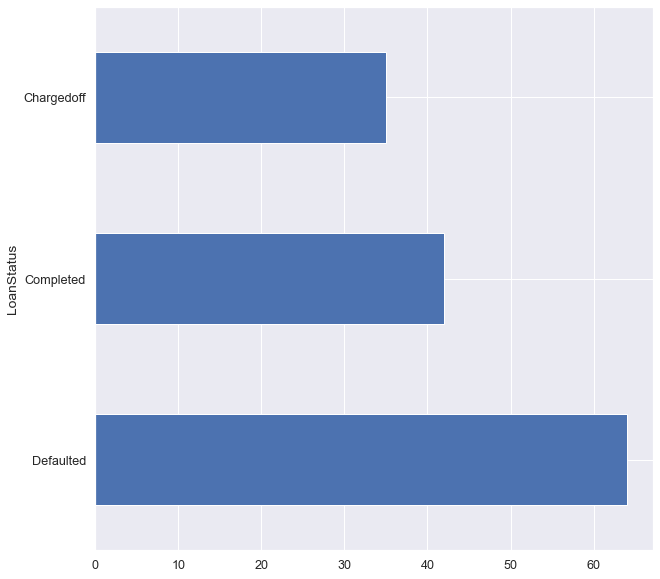

---------------------------------------------------------------------------------------------------------------------


In [48]:
for grade in grades:
    print(grade)
    plt.figure(figsize=(10,10))
    grouped_onCreditGrad_App['LoanStatus'].value_counts().loc[grade].plot.barh()
    plt.show()
    print("---------------------------------------------------------------------------------------------------------------------")

##### the  credit grade is some kinda accurate

### --------------------------------------------------------------------------------------------------------------------------------------------------------------

Research Question 7 : **Now we know the Credit Grade is accurate
and is a tool that is used by the organization in determining the
person’s creditworthiness. Now we need to understand does the
ProsperScore, the custom built risk assesment system is being used
in determing borrower’s rate?**

From a theoretical standpoint, if the higher ProsperScore leads to lower Borrower Rate and Borrower Annual Percentage Rate that means the Prosper Score is being used alongside the Credit Grade in determing a person’s creditworthiness.

In [49]:
# Check the Multivariate Relationship between BorrowerRate and BorrowerAPR.

In [50]:
df_loans[['BorrowerRate','ProsperScore','BorrowerAPR']].describe()

,BorrowerRate,ProsperScore,BorrowerAPR
count,113066.000000,83982.000000,113066.000000
mean,0.192948,5.952871,0.218963
std,0.074916,2.373517,0.080475
min,0.000000,1.000000,0.006530
25%,0.134000,4.000000,0.156290
50%,0.184000,6.000000,0.209840
75%,0.250600,8.000000,0.283860
max,0.497500,11.000000,0.512290


Text(0.5, 1.0, 'Correlation')

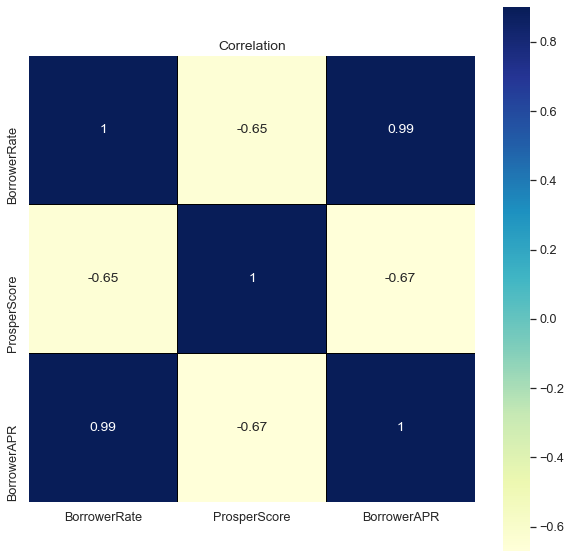

In [51]:
sns.set(font_scale=1.15)
plt.figure(figsize=(10, 10))
sns.heatmap(df_loans[['BorrowerRate','ProsperScore','BorrowerAPR']].corr(),  vmax=0.9, linewidths=0.02,
           square=True,
            annot=True,
            cmap='YlGnBu',
            linecolor="black")
plt.title('Correlation')

<Figure size 720x720 with 0 Axes>

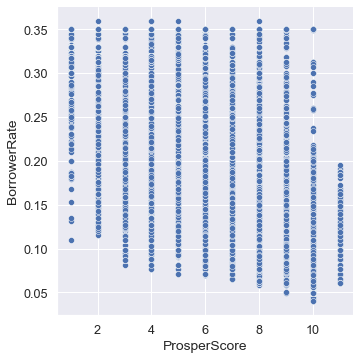

In [52]:
plt.figure(figsize=(10,10))
sns.relplot(data=df_loans, x="ProsperScore", y="BorrowerRate", kind="scatter")
plt.show()

<Figure size 720x720 with 0 Axes>

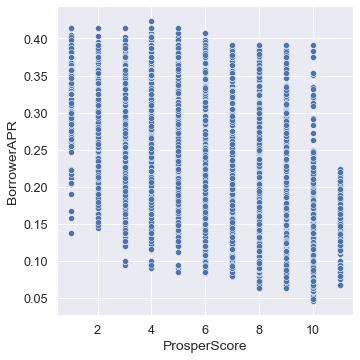

In [53]:
plt.figure(figsize=(10,10))
sns.relplot(data=df_loans, x="ProsperScore", y="BorrowerAPR", kind="scatter")
plt.show()

##### there is no a strong correlation between ProsperScore and  both of Borrower Rate, Borrower Annual Percentage . However, we can't deny that higher ProsperScore leads to lower Borrower Rate and Borrower Annual Percentage

### --------------------------------------------------------------------------------------------------------------------------------------------------------------

**Business Insight**

Since the most important assest of a P2P lending Organization is its ability in using its tool to determine a borrower’s creditworthiness as accurate as possible. The organization would be more confident to market its organization as a great investment for investor to invest in hence leading to more borrower and higher market capitilization and boost revenue growth.

cat_features
dis_features 
bo_features 
My_bo_features
date_features

In [54]:
data = df_loans.copy()
li = [col for col in data.columns if col not in data.columns[data.isnull().any()]]
new_cols = [col for col in li if data[col].dtype not in ['<M8[ns]','O']]
nu_data = data[new_cols].copy()
nu_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113066 entries, 0 to 113065
Data columns (total 59 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Term                                113066 non-null  int8   
 1   BorrowerAPR                         113066 non-null  float32
 2   BorrowerRate                        113066 non-null  float32
 3   LenderYield                         113066 non-null  float32
 4   ListingCategory (numeric)           113066 non-null  int8   
 5   EmploymentStatusDuration            113066 non-null  float32
 6   IsBorrowerHomeowner                 113066 non-null  int8   
 7   CurrentlyInGroup                    113066 non-null  int8   
 8   CreditScoreRangeLower               113066 non-null  float32
 9   CreditScoreRangeUpper               113066 non-null  float32
 10  CurrentCreditLines                  113066 non-null  float32
 11  OpenCreditLines           

In [56]:
new_cols1 = [col for col in li if data[col].dtype == 'O']
cat_data = data[new_cols1].copy()
cat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113066 entries, 0 to 113065
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   CreditGrade       113066 non-null  object
 1   LoanStatus        113066 non-null  object
 2   BorrowerState     113066 non-null  object
 3   Occupation        113066 non-null  object
 4   EmploymentStatus  113066 non-null  object
 5   IncomeRange       113066 non-null  object
 6   LoanKey           113066 non-null  object
dtypes: object(7)
memory usage: 6.0+ MB


In [57]:
all_data = data[li].copy()
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113066 entries, 0 to 113065
Data columns (total 70 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   ListingCreationDate                 113066 non-null  datetime64[ns]
 1   CreditGrade                         113066 non-null  object        
 2   Term                                113066 non-null  int8          
 3   LoanStatus                          113066 non-null  object        
 4   BorrowerAPR                         113066 non-null  float32       
 5   BorrowerRate                        113066 non-null  float32       
 6   LenderYield                         113066 non-null  float32       
 7   ListingCategory (numeric)           113066 non-null  int8          
 8   BorrowerState                       113066 non-null  object        
 9   Occupation                          113066 non-null  object        
 10  Employme

<AxesSubplot:xlabel='BorrowerRate', ylabel='LenderYield'>

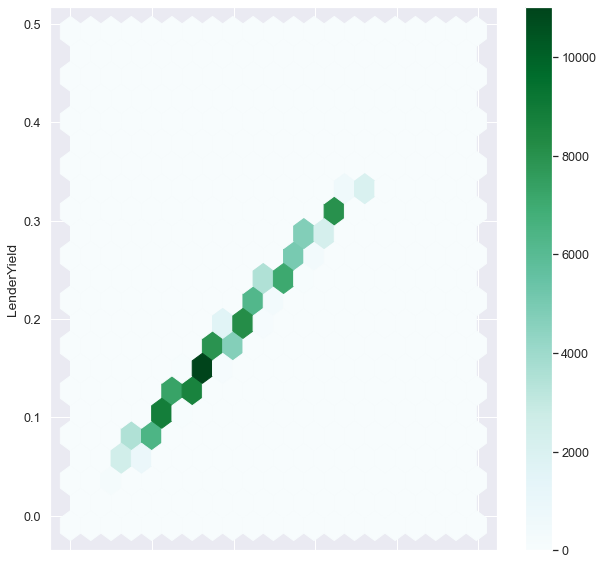

In [62]:
nu_data.plot.hexbin(x='BorrowerRate', y='LenderYield', gridsize=20, sharex=True, figsize=(10,10))

C:\Users\m2021\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BorrowerRate', ylabel='LenderYield'>

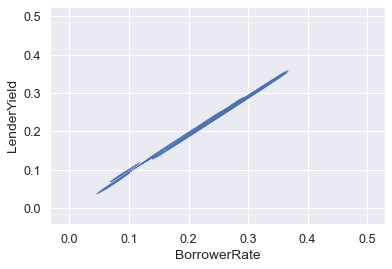

In [63]:
sns.kdeplot(nu_data['BorrowerRate'], nu_data['LenderYield'])

C:\Users\m2021\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CreditGrade', ylabel='BorrowerRate'>

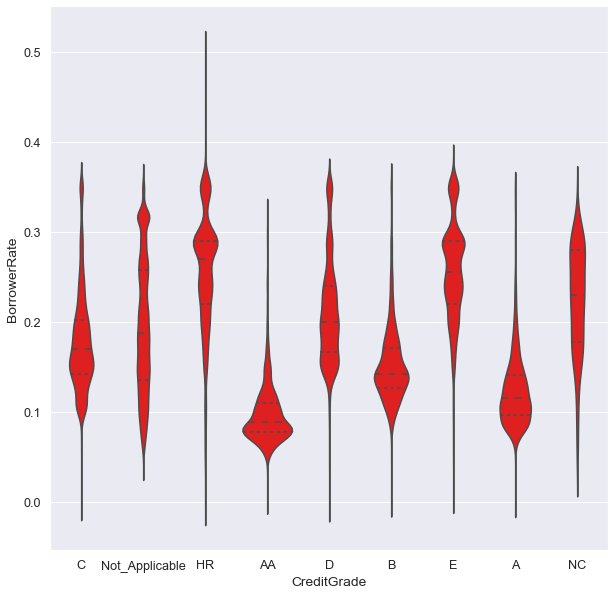

In [65]:
plt.figure(figsize=(10,10))
sns.violinplot( cat_data['CreditGrade'], nu_data['BorrowerRate'], inner='quartile', color='red')

# -----------------------------------------------------------------------------------------------------------------

In [68]:
# Perform the necessary imports
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=8, init='k-means++', verbose=1)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,kmeans)

# Fit the pipeline to samples
pipeline.fit(clust_data)

# Calculate the cluster labels: labels
labels = pipeline.predict(clust_data)

print(labels)

Initialization complete
Iteration 0, inertia 6695551.79526743
Iteration 1, inertia 5195183.127352929
Iteration 2, inertia 5072968.58902558
Iteration 3, inertia 5039470.719741971
Iteration 4, inertia 5016145.195925785
Iteration 5, inertia 4990252.981543664
Iteration 6, inertia 4959418.351188087
Iteration 7, inertia 4927031.558255155
Iteration 8, inertia 4899717.213327293
Iteration 9, inertia 4877774.294267055
Iteration 10, inertia 4859805.1896911105
Iteration 11, inertia 4846579.129849275
Iteration 12, inertia 4837811.445846615
Iteration 13, inertia 4833066.5622596815
Iteration 14, inertia 4830745.8184987465
Iteration 15, inertia 4829607.113550039
Iteration 16, inertia 4829083.009492851
Iteration 17, inertia 4828823.8779718205
Iteration 18, inertia 4828685.951091208
Iteration 19, inertia 4828616.699067689
Iteration 20, inertia 4828576.545936955
Iteration 21, inertia 4828549.666630143
Iteration 22, inertia 4828531.265584235
Iteration 23, inertia 4828519.3290441735
Iteration 24, inertia 4

Iteration 47, inertia 4836296.840124194
Iteration 48, inertia 4835868.409651353
Iteration 49, inertia 4835403.065117238
Iteration 50, inertia 4834941.377358864
Iteration 51, inertia 4834541.022190641
Iteration 52, inertia 4834213.868298986
Iteration 53, inertia 4833935.065840855
Iteration 54, inertia 4833689.89449515
Iteration 55, inertia 4833501.742442404
Iteration 56, inertia 4833350.564462594
Iteration 57, inertia 4833226.635006112
Iteration 58, inertia 4833115.902785945
Iteration 59, inertia 4833012.861574475
Iteration 60, inertia 4832907.443853
Iteration 61, inertia 4832793.294129012
Iteration 62, inertia 4832678.980071997
Iteration 63, inertia 4832575.846420194
Iteration 64, inertia 4832473.112283485
Iteration 65, inertia 4832372.70958625
Iteration 66, inertia 4832273.653630666
Iteration 67, inertia 4832167.077973293
Iteration 68, inertia 4832062.127706043
Iteration 69, inertia 4831948.294095742
Iteration 70, inertia 4831824.519367547
Iteration 71, inertia 4831677.6856164355
Iter

Iteration 24, inertia 4835509.944421905
Iteration 25, inertia 4835378.793455574
Iteration 26, inertia 4835251.107672253
Iteration 27, inertia 4835133.122669252
Iteration 28, inertia 4835019.732626918
Iteration 29, inertia 4834913.635690217
Iteration 30, inertia 4834821.191008753
Iteration 31, inertia 4834735.37070782
Iteration 32, inertia 4834656.18193601
Iteration 33, inertia 4834581.531754932
Iteration 34, inertia 4834515.956851208
Iteration 35, inertia 4834456.417345247
Iteration 36, inertia 4834407.292628704
Iteration 37, inertia 4834358.608659369
Iteration 38, inertia 4834316.699750959
Iteration 39, inertia 4834285.44594572
Iteration 40, inertia 4834253.838695638
Iteration 41, inertia 4834227.273767615
Iteration 42, inertia 4834203.158359737
Iteration 43, inertia 4834181.747115902
Iteration 44, inertia 4834160.574516506
Iteration 45, inertia 4834141.164261177
Iteration 46, inertia 4834124.794920112
Iteration 47, inertia 4834109.892938422
Iteration 48, inertia 4834096.848356701
Ite

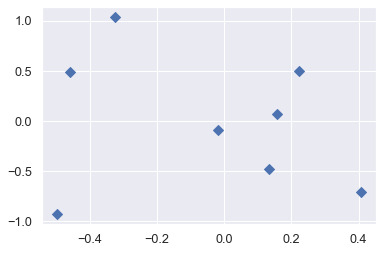

In [71]:
# Assign the cluster centers: centroids
centroids = pipeline[1].cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x,centroids_y,marker='D',s=50)
plt.show()

In [72]:
clust_data

,Term,BorrowerAPR,BorrowerRate,LenderYield,ListingCategory (numeric),EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,CreditScoreRangeLower,CreditScoreRangeUpper,...,had_PriorLoans,Is_ChargedOff,Is_CreditGradeApplicable,IsClosed,IsInProgress,IsLate,IsInGroup,MinIncome,MaxIncome,Loan_Quarter
0,36,0.16516,0.1580,0.1380,0,2.0,1,1,640.0,659.0,...,0,0,1,1,0,0,0,25000.00000,49999.000000,3
1,36,0.12016,0.0920,0.0820,2,44.0,0,0,680.0,699.0,...,0,0,0,0,1,0,0,50000.00000,74999.000000,1
2,36,0.28269,0.2750,0.2400,0,67.0,0,1,480.0,499.0,...,0,0,1,1,0,0,1,35714.28125,53571.429688,1
3,36,0.12528,0.0974,0.0874,16,113.0,1,0,800.0,819.0,...,0,0,0,0,1,0,0,25000.00000,49999.000000,4
4,36,0.24614,0.2085,0.1985,2,44.0,1,0,680.0,699.0,...,1,0,0,0,1,0,0,100000.00000,125000.000000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113061,36,0.22354,0.1864,0.1764,1,246.0,1,0,700.0,719.0,...,0,0,0,0,1,0,0,50000.00000,74999.000000,2
113062,36,0.13220,0.1110,0.1010,7,21.0,1,0,700.0,719.0,...,1,0,0,0,1,0,0,75000.00000,99999.000000,4
113063,60,0.23984,0.2150,0.2050,1,84.0,1,0,700.0,719.0,...,0,0,0,0,1,0,0,25000.00000,49999.000000,4
113064,60,0.28408,0.2605,0.2505,2,94.0,1,0,680.0,699.0,...,1,0,0,1,0,0,0,25000.00000,49999.000000,4


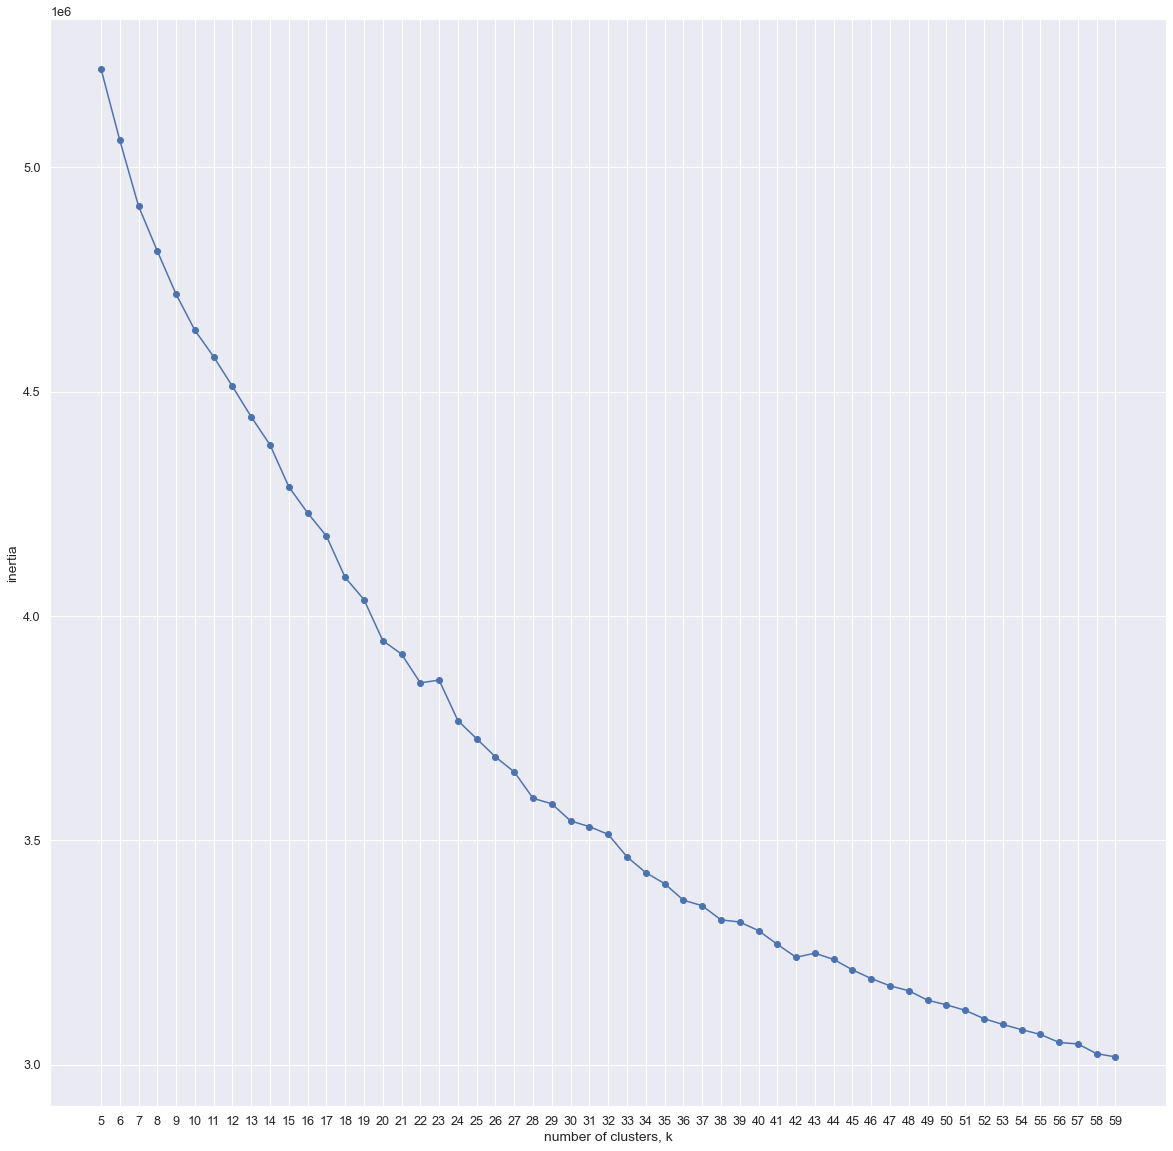

In [81]:
ks = range(5, 60)
inertias = []

for k in ks:
    # Create scaler: scaler
    scaler = StandardScaler()

    # Create KMeans instance: kmeans
    kmeans = KMeans(n_clusters=k, init='k-means++', verbose=0)

    # Create pipeline: pipeline
    pipeline = make_pipeline(scaler,kmeans)
    
    # Fit model to samples
    pipeline.fit(clust_data)
    
    # Append the inertia to the list of inertias
    inertias.append(pipeline[1].inertia_)
    
# Plot ks vs inertias
plt.figure(figsize=(20,20))
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [82]:
pca_data = clust_data.copy()

In [83]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_std = sc.fit_transform(pca_data)
print(x_std.shape)
x_std

(113066, 59)


array([[-0.46060384, -0.66876949, -0.46646389, ..., -0.83591603,
        -0.78342169,  0.40425841],
       [-0.46060384, -1.22795884, -1.3474475 , ...,  0.0192345 ,
         0.04530479, -1.34045039],
       [-0.46060384,  0.79170862,  1.0952796 , ..., -0.4694231 ,
        -0.66499901, -1.34045039],
       ...,
       [ 1.84233388,  0.25923627,  0.29438546, ..., -0.83591603,
        -0.78342169,  1.2766128 ],
       [ 1.84233388,  0.80898149,  0.90173029, ..., -0.83591603,
        -0.78342169,  1.2766128 ],
       [-0.46060384, -1.08219682, -1.18860349, ...,  0.0192345 ,
         0.04530479, -1.34045039]])

In [84]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_std)
pca.explained_variance_ratio_

array([1.43116647e-01, 9.91784763e-02, 7.56289764e-02, 5.62604799e-02,
       4.64937076e-02, 3.93457342e-02, 3.33958954e-02, 3.23935587e-02,
       2.81632312e-02, 2.55944782e-02, 2.41500422e-02, 2.12930479e-02,
       1.97743848e-02, 1.92953497e-02, 1.80383194e-02, 1.75072469e-02,
       1.72699948e-02, 1.69935908e-02, 1.63201099e-02, 1.60544559e-02,
       1.50875255e-02, 1.47106627e-02, 1.45848027e-02, 1.42112475e-02,
       1.31320849e-02, 1.29598813e-02, 1.20564571e-02, 1.18937844e-02,
       1.16252008e-02, 1.10474654e-02, 1.05262633e-02, 9.82891158e-03,
       8.95950237e-03, 8.70049784e-03, 8.10910134e-03, 7.86199383e-03,
       7.05237884e-03, 6.81034140e-03, 6.26777352e-03, 4.44421683e-03,
       4.29276543e-03, 4.21719118e-03, 3.91440538e-03, 2.65379815e-03,
       2.43853489e-03, 1.41530439e-03, 1.38796855e-03, 1.28132325e-03,
       8.29234577e-04, 5.65804239e-04, 4.33382597e-04, 1.52333989e-04,
       7.78804823e-05, 7.61880104e-05, 7.00893222e-05, 4.52921006e-05,
      

<BarContainer object of 59 artists>

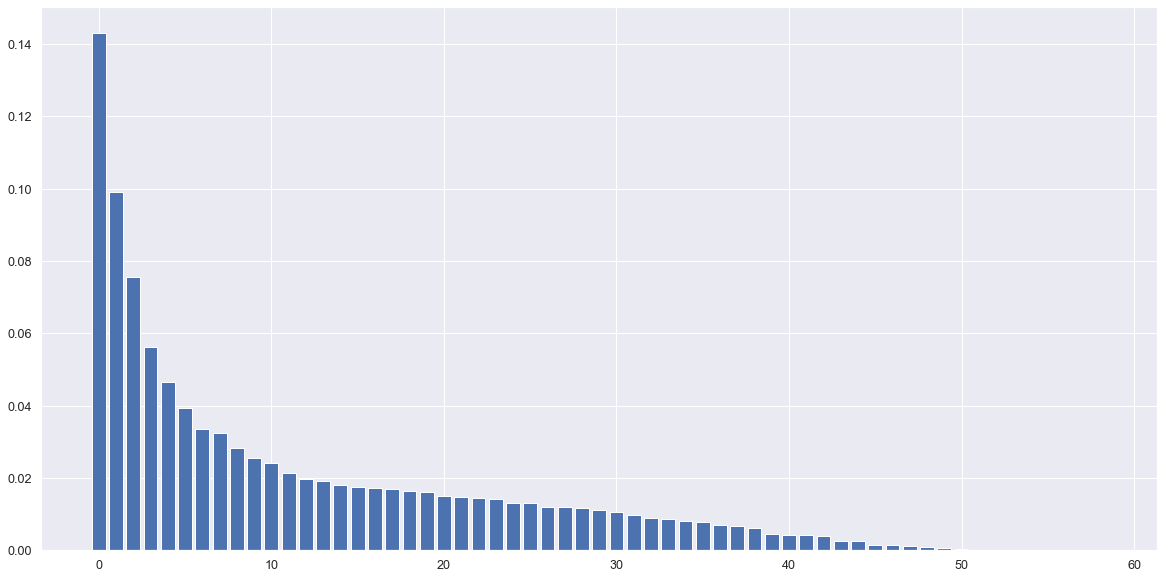

In [85]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(20,10))
plt.bar(np.arange(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)

In [86]:
var_per = pca.explained_variance_ratio_.cumsum()
var_per[var_per < 0.95]

array([0.14311665, 0.24229512, 0.3179241 , 0.37418458, 0.42067829,
       0.46002402, 0.49341992, 0.52581348, 0.55397671, 0.57957119,
       0.60372123, 0.62501428, 0.64478866, 0.66408401, 0.68212233,
       0.69962958, 0.71689957, 0.73389316, 0.75021327, 0.76626773,
       0.78135525, 0.79606592, 0.81065072, 0.82486197, 0.83799405,
       0.85095393, 0.86301039, 0.87490417, 0.88652937, 0.89757684,
       0.9081031 , 0.91793201, 0.92689152, 0.93559201, 0.94370112])

In [87]:
var_per[var_per < 0.95].shape

(35,)

In [88]:
pca = PCA(n_components = 35)
x_trf = pca.fit_transform(x_std)
x_trf.shape

(113066, 35)

Text(0, 0.5, 'Variance')

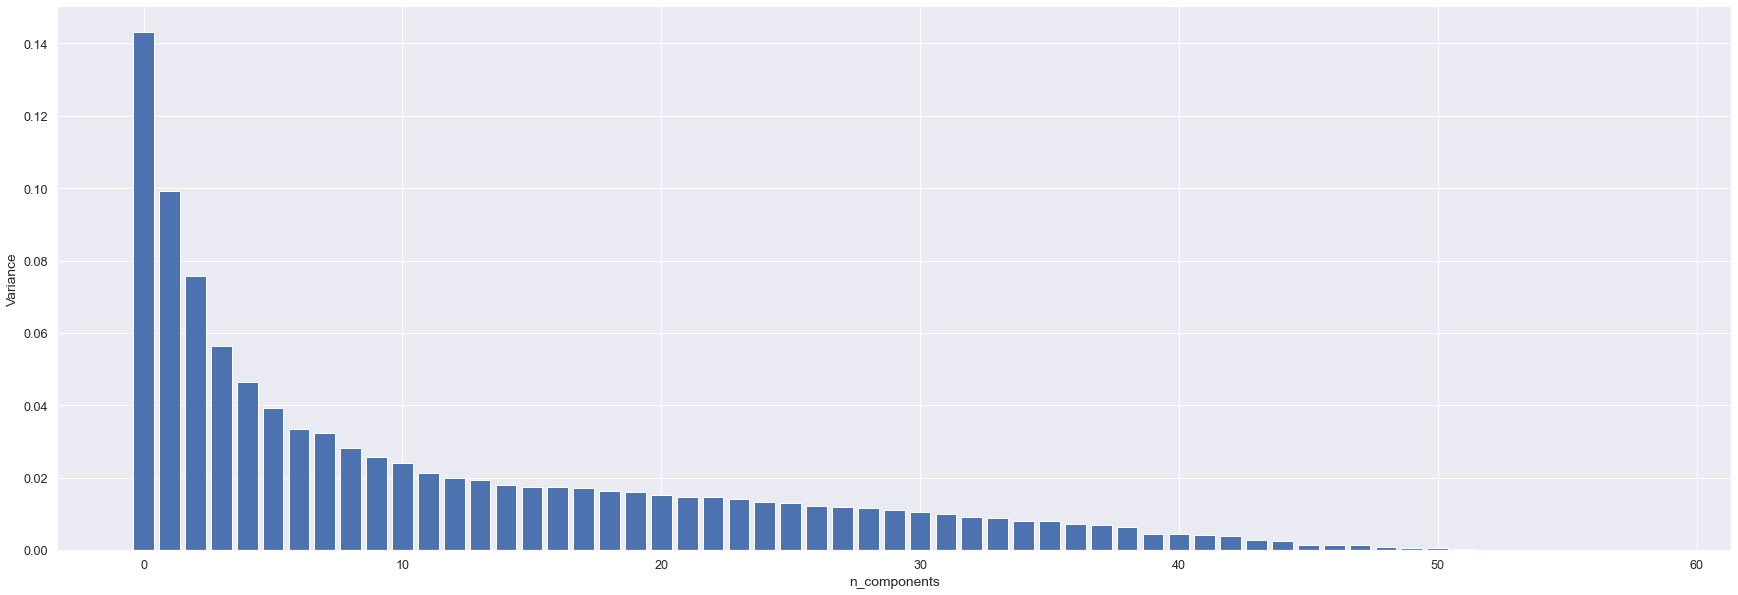

In [90]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as sklearnPCA
import matplotlib.pyplot as plt
import numpy as np

#standardized data
sc = StandardScaler()
sc.fit(pca_data)
X_std = sc.transform(pca_data)

#If n_components is not set then all components are stored 
pca = sklearnPCA()
sklearn_pca = pca.fit(X_std)

var_per = sklearn_pca.explained_variance_ratio_
cum_var_per = sklearn_pca.explained_variance_ratio_.cumsum()

plt.figure(figsize=(30,10))
ind = np.arange(len(var_per)) 
plt.bar(ind,var_per)
plt.xlabel('n_components')
plt.ylabel('Variance')

Text(0, 0.5, 'Variance')

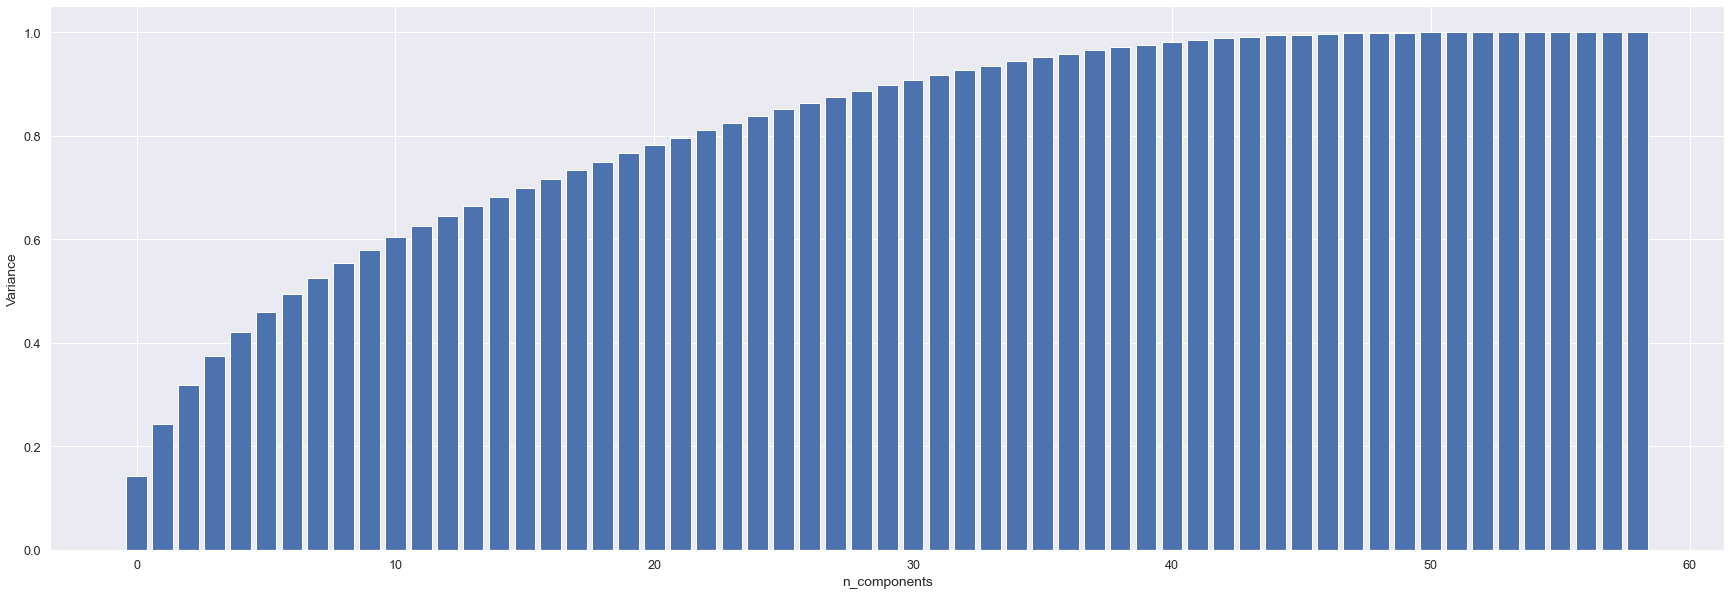

In [91]:
plt.figure(figsize=(30,10))
ind = np.arange(len(cum_var_per)) 
plt.bar(ind,cum_var_per)
plt.xlabel('n_components')
plt.ylabel('Variance')

In [92]:
print(len(cum_var_per[cum_var_per < 0.95]))
pca = sklearnPCA(n_components = len(cum_var_per[cum_var_per < 0.95]))
X_trans = pca.fit_transform(X_std)
X_trans.shape

35


(113066, 35)